# Identification of patterns that determine the success of a computer game

The online store sells computer games all over the world. Historical data on game sales, user and expert ratings, genres and platforms (for example, Xbox or PlayStation) are available from open sources. There are data available up to 2016, it is required to plan a hypothetical campaign for 2017.

### The purpose of the study

It is necessary to identify patterns that determine the success of the game. This will allow you to bet on a potentially popular product and plan advertising campaigns. It is also necessary to answer a number of questions:
- how many games were released in different years? Determine the importance of data for the available periods.
- what period of time is needed for new platforms to appear and for old ones to disappear?
- which platforms are leading in sales, are they growing or falling?
- how do users' and critics' reviews affect sales within one popular platform?
- what are the distinctive features of the most profitable genres?
- do genres with high and low sales stand out?

It is also necessary to accept or refute hypotheses:
- Average user ratings of the Xbox One and PC platforms are the same;
- Average user ratings of genres Action (English "action", action games) and Sports (English "sports competitions") are different.

### Research plan

Data about sales of games is presented in the names.csv file. Nothing is known about the quality of the data. Therefore, before testing hypotheses, we will need to review the data. The data will be checked for errors and their impact on the study will be assessed. Then, at the preprocessing stage, the most critical data errors will be corrected.

Thus, the study will take place in several stages:

- Data overview.
- Data preprocessing.
- Research data analysis
- Hypothesis testing.

___
## Data Overview
___

Importing all the necessary libraries

In [146]:
import pandas as pd;
import numpy as np;
import seaborn as sns;
import matplotlib.pyplot as plt;
import math
from scipy import stats as st
from scipy.stats import bartlett
import warnings
warnings.filterwarnings('ignore')

Let's read the data files from the /datasets folder and save them in variables:

In [147]:
try:
    df = pd.read_csv('/Users/vladislav/Documents/datasets/games.csv',sep=',')
except:
    df = pd.read_csv('/datasets/games.csv',sep=',')

Let's make a first idea of the data:

In [148]:
display(df.head())
df.info()
display(df.describe())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


So, there are 11 columns in the table. The data types **object,float64** are presented. According to the data documentation:

* *Name* — name of the game;
* *Platform* — platform
* *Year_of_Release* — year of release
* *Genre* — genre of the game
* *NA_sales* — sales in North America (millions of copies sold)
* *EU_sales* — sales in Europe (millions of copies sold)
* *JP_sales* — sales in Japan (millions of copies sold)
* *Other_sales* — sales in other countries (millions of copies sold)
* *Critic_Score* — evaluation critics (maximum 100)
* *User_Score* — user rating (maximum 10)
* *Rating* — rating from the ESRB organization (English Entertainment Software Rating Board). This association determines the rating of computer games and assigns them a suitable age category.

According to a preliminary review of the data, the following ** problems in the data ** can be noted:
- there are no missing values only in the columns indicating the country where the game was purchased and in the platform column, there are missing values in the other columns;

- column names must be renamed according to the rules of the "snake register";
- the data type of the columns *Year_of_Release* and *User_score* does not correspond to the optimal data type for working with these values.

Then you can proceed to data preprocessing.
___

## Data preprocessing

First you need to change the column headers

In [149]:
df = df.rename(columns={"Name":"name",
                  "Platform":"platform",
                  "Year_of_Release":"year_of_release",
                  "Genre":"genre",
                  "NA_sales":"na_sales",
                  "EU_sales":"eu_sales",
                  "JP_sales":"jp_sales",
                  "Other_sales":"other_sales",
                  "Critic_Score":"critic_score",
                  "User_Score":"user_score",
                  "Rating":"rating"})

In [150]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


___
There are 2 missing values in the *name* column.

In [151]:
df.query('name != name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Since in 2 of these lines, in addition to the absence of a name, there is no more important data on the genre and ratings of the game, it is easier to delete them.

In [152]:
df = df.drop(df.query('name != name').index)

___
In the *year_of_release* column, the percentage of missing values is:

In [153]:
display("{:.2%}".format(df['year_of_release'].isna().sum()/len(df)))

'1.61%'

Let's study missing values in the *year_of_release column*:

In [154]:
df.query('year_of_release != year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


It can be seen that there are 269 missing values in the column, while the year of release is indicated in the name of part of the sports genre games. This data can be used to return the release year of the game.

In [155]:
df_no_year = df.query('year_of_release != year_of_release')
df_no_year_sport = df_no_year[df_no_year['name'].str.contains('20|19')]
df_no_year_sport['year_of_release'] = df_no_year_sport['name'].str[-4:]
df_no_year_sport

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,2004,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,2004,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
475,wwe Smackdown vs. Raw 2006,PS2,2006,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
1650,NASCAR Thunder 2003,PS2,2003,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E
2492,MLB SlugFest 20-03,PS2,0-03,Sports,0.41,0.32,0.00,0.11,77.0,8.2,E
2572,PES 2009: Pro Evolution Soccer,PSP,ccer,Sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN
3486,Madden NFL 2002,XB,2002,Sports,0.53,0.02,0.00,0.03,90.0,8.1,E
4775,NFL GameDay 2003,PS2,2003,Sports,0.20,0.15,0.00,0.05,60.0,tbd,E
5156,NBA Live 2003,XB,2003,Sports,0.31,0.04,0.00,0.01,82.0,8.8,E
5336,Tomb Raider (2013),PC,013),Action,0.06,0.25,0.00,0.04,86.0,8.5,M


The data from the name is obtained, but in the name of the three games the year was not at the end, we can replace these values manually.
The game called "Jet X20" needs to be deleted, the numbers in its name are not related to the release date.

In [156]:
df_no_year_sport.loc[(df_no_year_sport.name == "MLB SlugFest 20-03"),'year_of_release'] = 2003
df_no_year_sport.loc[(df_no_year_sport.name == "PES 2009: Pro Evolution Soccer"),'year_of_release'] = 2009
df_no_year_sport.loc[(df_no_year_sport.name == "Tomb Raider (2013)"),'year_of_release'] = 2013
df_no_year_sport = df_no_year_sport.drop(df_no_year_sport.query('name == "Jet X20"').index)
df_no_year_sport

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,2004,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,2004,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
475,wwe Smackdown vs. Raw 2006,PS2,2006,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
1650,NASCAR Thunder 2003,PS2,2003,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E
2492,MLB SlugFest 20-03,PS2,2003,Sports,0.41,0.32,0.00,0.11,77.0,8.2,E
2572,PES 2009: Pro Evolution Soccer,PSP,2009,Sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN
3486,Madden NFL 2002,XB,2002,Sports,0.53,0.02,0.00,0.03,90.0,8.1,E
4775,NFL GameDay 2003,PS2,2003,Sports,0.20,0.15,0.00,0.05,60.0,tbd,E
5156,NBA Live 2003,XB,2003,Sports,0.31,0.04,0.00,0.01,82.0,8.8,E
5336,Tomb Raider (2013),PC,2013,Action,0.06,0.25,0.00,0.04,86.0,8.5,M


Thus, a cross-section of games was obtained, in the name of which there was a release date. We can remove unnecessary columns from it and change the format of the release year to numeric. An important nuance: the year of release from the name is actually more than one, so that the name of the game remains relevant for the next year - in this regard, 1 year was deducted from the year in the name.

In [157]:
df_no_year_sport.drop(['genre','na_sales','eu_sales','jp_sales','other_sales','critic_score','user_score','rating'], axis=1, inplace=True)
df_no_year_sport['year_of_release'] = df_no_year_sport['year_of_release'].astype('float64')
df_no_year_sport['year_of_release'] = df_no_year_sport['year_of_release']-1
df_no_year_sport

,name,platform,year_of_release
183,Madden NFL 2004,PS2,2003.0
377,FIFA Soccer 2004,PS2,2003.0
475,wwe Smackdown vs. Raw 2006,PS2,2005.0
1650,NASCAR Thunder 2003,PS2,2002.0
2492,MLB SlugFest 20-03,PS2,2002.0
2572,PES 2009: Pro Evolution Soccer,PSP,2008.0
3486,Madden NFL 2002,XB,2001.0
4775,NFL GameDay 2003,PS2,2002.0
5156,NBA Live 2003,XB,2002.0
5336,Tomb Raider (2013),PC,2012.0


Now we can join this table with the main data frame to take the missing values from it.

In [158]:
df = df.merge(df_no_year_sport, how='left',on=['name','platform'])
df

,name,platform,year_of_release_x,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_of_release_y
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,NaN
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,NaN
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN
16709,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,NaN
16710,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,NaN
16711,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,NaN


From the new column, we will pull up the year for those games where it was not previously specified. It is better to do this using a function.

In [159]:
def year_from_name(year_of_release_x,year_of_release_y):
    if year_of_release_x != year_of_release_x:
        return year_of_release_y
    else:
        return year_of_release_x
df['year_of_release_x'] = df.apply(lambda x: year_from_name(x.year_of_release_x, x.year_of_release_y),axis=1)
df.query('year_of_release_y == year_of_release_y')

,name,platform,year_of_release_x,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year_of_release_y
183,Madden NFL 2004,PS2,2003.0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,2003.0
377,FIFA Soccer 2004,PS2,2003.0,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,2003.0
475,wwe Smackdown vs. Raw 2006,PS2,2005.0,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,2005.0
1649,NASCAR Thunder 2003,PS2,2002.0,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E,2002.0
2491,MLB SlugFest 20-03,PS2,2002.0,Sports,0.41,0.32,0.00,0.11,77.0,8.2,E,2002.0
2571,PES 2009: Pro Evolution Soccer,PSP,2008.0,Sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN,2008.0
3485,Madden NFL 2002,XB,2001.0,Sports,0.53,0.02,0.00,0.03,90.0,8.1,E,2001.0
4774,NFL GameDay 2003,PS2,2002.0,Sports,0.20,0.15,0.00,0.05,60.0,tbd,E,2002.0
5155,NBA Live 2003,XB,2002.0,Sports,0.31,0.04,0.00,0.01,82.0,8.8,E,2002.0
5335,Tomb Raider (2013),PC,2012.0,Action,0.06,0.25,0.00,0.04,86.0,8.5,M,2012.0


It can be seen that the date has been joined, now we can delete an unnecessary further column, and return the name of the original column with the date to its original form.

In [160]:
df.drop('year_of_release_y', axis = 1, inplace = True)
df.rename(columns={df.columns[2]: 'year_of_release'}, inplace=True)
df['year_of_release'].isna().sum()

251

Then we can explore the remaining games without a release date:

In [161]:
df.query('year_of_release != year_of_release').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.0,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.0,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
677,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.0,0.21,78.0,6.6,E10+


Probably some of the games without a publication date on one platform had a publication date on another platform:

In [162]:
df.query('name == "LEGO Batman: The Videogame"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
397,LEGO Batman: The Videogame,X360,2008.0,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
460,LEGO Batman: The Videogame,DS,2008.0,Action,1.75,1.01,0.0,0.29,72.0,8,E10+
1518,LEGO Batman: The Videogame,PS3,2008.0,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+
1537,LEGO Batman: The Videogame,PSP,NaN,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+
1552,LEGO Batman: The Videogame,PS2,2008.0,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+
12464,LEGO Batman: The Videogame,PC,2008.0,Action,0.02,0.03,0.0,0.01,80.0,7.8,E10+


The information was confirmed. Ideally, it would be necessary to request accurate information on the time of the game's appearance on each platform, but under the given conditions, it can be assumed that the games were published on different platforms in approximately the same period of time. Then we can calculate the median value of the year of publication on all platforms by the name of the game and return it for lines with missing values.

In [163]:
df['year_of_release'] = df.groupby('name')['year_of_release'].transform(lambda x: x.fillna(x.median()))
df['year_of_release'].isna().sum()

139

After the replacement, there were 139 missing values in the publication date.

According to the introductory conditions of the study, gaming platforms have a certain period of "life" during which they are actively used, and during which new games are released on it. Based on this assumption, it is possible to replace the missing values with the median value of the year of publication of all games for each of the platforms.

In [164]:
df['year_of_release'] = df.groupby('platform')['year_of_release'].transform(lambda x: x.fillna(x.median()))
df['year_of_release'].isna().sum()

0

There are no more missing values in this column. Let's study the values by year, for incorrect data.

In [165]:
df['year_of_release'].value_counts()

2008.0    1461
2009.0    1455
2010.0    1284
2007.0    1204
2011.0    1164
2006.0    1020
2005.0     949
2002.0     843
2003.0     797
2004.0     773
2012.0     663
2015.0     606
2014.0     582
2013.0     552
2016.0     502
2001.0     485
1998.0     386
2000.0     351
1999.0     341
1997.0     290
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1982.0      52
1981.0      46
1992.0      43
1991.0      41
1986.0      21
1989.0      17
1983.0      17
2004.5      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2002.5       2
2005.5       1
2001.5       1
Name: year_of_release, dtype: int64

According to this grouping, it can be seen that the column contains partially incorrect data, which probably appeared after replacement with the median value. It is necessary to replace this data.

In [166]:
df.loc[(df['year_of_release'] > 2002)&(df['year_of_release'] < 2003), 'year_of_release'] = 2002
df.loc[(df['year_of_release'] > 2001)&(df['year_of_release'] < 2002), 'year_of_release'] = 2001
df.loc[(df['year_of_release'] > 2005)&(df['year_of_release'] < 2006), 'year_of_release'] = 2005
df.loc[(df['year_of_release'] > 2002)&(df['year_of_release'] < 2003)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


After getting rid of incorrect values and missing values, it is necessary to bring the data by year to an integer format.

In [167]:
df['year_of_release'] = df['year_of_release'].astype('int64')

Now we can study the distribution of games by year

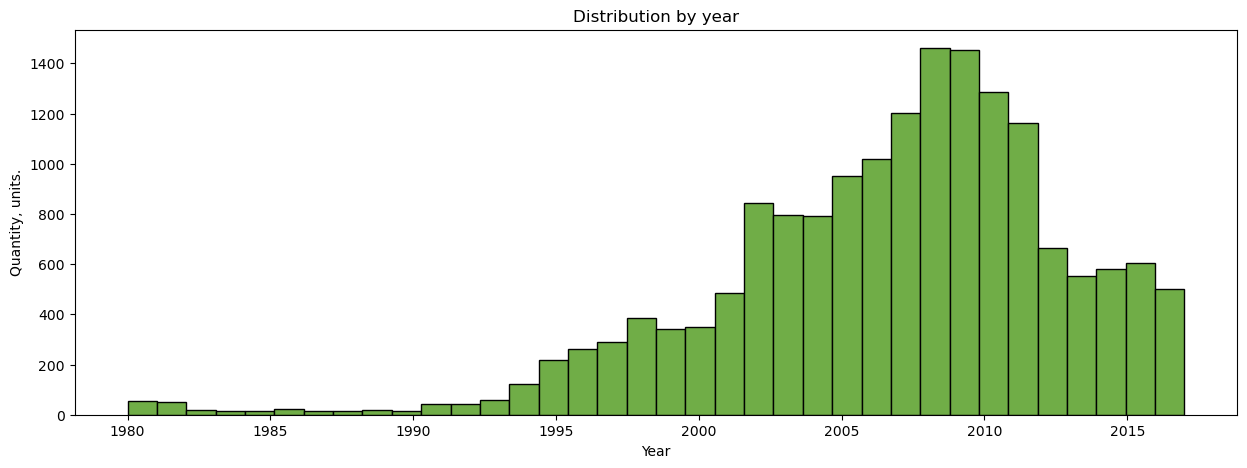

In [168]:
df['year_of_release'].plot(kind='hist', bins=36, range=(1980,2017), figsize=(15,5),  color="#70AD47", edgecolor="black")
plt.title("Distribution by year")
plt.xlabel("Year")
plt.ylabel("Quantity, units.")
plt.show()

The distribution shows that from the 80s to the mid-90s, the volume of games produced on all platforms was minimal, which is typical for the beginning of the development of the industry as such. Since the mid-90s, with the increase in the performance of personal computers, as well as the release of game consoles of the so-called 5th generation (approx. Sony's Playstation, Nintendo 64, Sega Saturn) there is an almost 10-fold increase in the number of video games produced.
The next noticeable increase in the number of game titles produced was observed in the early 2000s: 1-2 years after the release of the 6th generation consoles: Playstation 2 and Xbox (along with the launch of the Xbox live online multiplayer service).
In 2011-2013, the so-called eighth-generation game consoles entered the market, differing from their predecessors only by a small increase in performance, while previous models were more often based on new revolutionary technologies. The interest in controlling with the help of movements decreases, returning to the classic gamepads. In addition to this, the power of smartphones already allows them to fully compete with consoles in the mobile gaming industry. These reasons together led to a decrease in the number of games produced.
Thus, the data on the year of release are distributed logically, and do not cause additional questions.
___

There are no missing values in the *genre* column. You should check it for hidden duplicates.

In [169]:
df['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

There are no duplicates, you can proceed to preprocessing the data in the next column.
___

There are no missing values in the *platform* column. We should also check it for hidden duplicates.

In [170]:
df['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

There are also no duplicates in this column, you can proceed to preprocessing the data in the next column.
___

Let's study the sales data in North America in *na_sales*. According to the description of the dataframe above, it was seen that there are no missing values in the column, and the data has a numeric format (float64). Let's build a histogram of the distribution.

In [171]:
display("The share of games that were sold in North America: {:.2%}".format(df.query('na_sales != 0')['na_sales'].count()/len(df)))
display("The share of games that were sold in Europe: {:.2%}".format(df.query('eu_sales != 0')['eu_sales'].count()/len(df)))
display("The share of games that were sold in Japan: {:.2%}".format(df.query('jp_sales != 0')['jp_sales'].count()/len(df)))
display("The share of games that were sold in other countriesх: {:.2%}".format(df.query('other_sales != 0')['other_sales'].count()/len(df)))
df[['na_sales','eu_sales','jp_sales','other_sales']].describe()

'The share of games that were sold in North America: 73.03%'

'The share of games that were sold in Europe: 64.88%'

'The share of games that were sold in Japan: 37.10%'

'The share of games that were sold in other countriesх: 60.51%'

,na_sales,eu_sales,jp_sales,other_sales
count,16713.000000,16713.000000,16713.000000,16713.000000
mean,0.263302,0.145045,0.077625,0.047343
std,0.813565,0.503359,0.308871,0.186742
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.080000,0.020000,0.000000,0.010000
75%,0.240000,0.110000,0.040000,0.030000
max,41.360000,28.960000,10.220000,10.570000


According to the terms of the study, it is necessary to add the total value of sales in all countries for each game.

In [172]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

___
Followed by the columns *critic_score* and *user_score*.

The *user_score* column contains the values "tbd", which can be deciphered as "to be decided" or "to be determined", which means that the estimate is subject to refinement. In the given conditions for the study, this is equivalent to a missing value, because it is impossible to wait or clarify this information. Thus, in order to be able to perform calculations with the data in this column, it is better to replace "tbd" with Nan. 

In [173]:
df['user_score'] = df['user_score'].replace(['tbd'], np.nan)
df['user_score'] = df['user_score'].astype('float64')
df[['critic_score','user_score']].describe()

,critic_score,user_score
count,8137.000000,7590.000000
mean,68.967679,7.125046
std,13.938165,1.500006
min,13.000000,0.000000
25%,60.000000,6.400000
50%,71.000000,7.500000
75%,79.000000,8.200000
max,98.000000,9.700000


There are no outliers in the columns, all values are similar to real estimates. At the same time, some of the values are missing in the columns. It is necessary to understand for what reason there are omissions, perhaps there are patterns.

In [174]:
display(df.groupby('year_of_release').apply(lambda x: x.critic_score.isnull().sum()/len(x)))
display(df.groupby('year_of_release').apply(lambda x: x.user_score.isnull().sum()/len(x)))

year_of_release
1980    1.000000
1981    1.000000
1982    1.000000
1983    1.000000
1984    1.000000
1985    0.928571
1986    1.000000
1987    1.000000
1988    0.933333
1989    1.000000
1990    1.000000
1991    1.000000
1992    0.976744
1993    1.000000
1994    0.991736
1995    1.000000
1996    0.969582
1997    0.941379
1998    0.917098
1999    0.885630
2000    0.592593
2001    0.320988
2002    0.240237
2003    0.245922
2004    0.267089
2005    0.301053
2006    0.381373
2007    0.421096
2008    0.501711
2009    0.546392
2010    0.591121
2011    0.559278
2012    0.503771
2013    0.500000
2014    0.549828
2015    0.628713
2016    0.537849
dtype: float64

year_of_release
1980    1.000000
1981    1.000000
1982    1.000000
1983    1.000000
1984    1.000000
1985    0.928571
1986    1.000000
1987    1.000000
1988    0.933333
1989    1.000000
1990    1.000000
1991    1.000000
1992    0.976744
1993    1.000000
1994    0.991736
1995    1.000000
1996    0.969582
1997    0.937931
1998    0.911917
1999    0.909091
2000    0.695157
2001    0.467078
2002    0.435503
2003    0.338770
2004    0.360759
2005    0.378947
2006    0.450000
2007    0.474252
2008    0.541410
2009    0.574570
2010    0.619159
2011    0.557560
2012    0.478130
2013    0.442029
2014    0.432990
2015    0.509901
2016    0.478088
dtype: float64

**According to this presentation, it can be seen that as the gaming industry has developed over time, games have increasingly received ratings from critics and users.**

Now we can restore the missing values in these columns. The algorithm of actions is as follows:
- Restore some of the values by calculating the average score for the name of the game on other platforms;
- Restore some of the values by calculating the average score of critics/users if there is a value in any of the columns (using a coefficient)
- Restore some of the remaining values according to the average estimates in the genre on a specific platform.

In [175]:
df['critic_score'].corr(df['user_score'])

0.5808778320767239

In [176]:
df['critic_score'] = df.groupby('name')['critic_score'].transform(lambda x: x.fillna(x.median()))
df['user_score'] = df.groupby('name')['user_score'].transform(lambda x: x.fillna(x.median()))

In [177]:
df[['critic_score', 'user_score']].describe()

,critic_score,user_score
count,9098.000000,8689.000000
mean,68.784843,7.091512
std,14.124159,1.503294
min,13.000000,0.000000
25%,60.000000,6.300000
50%,71.000000,7.400000
75%,79.000000,8.200000
max,98.000000,9.700000


In [178]:
df['critic_to_user_score'] = (df['critic_score']/10)/df['user_score']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,critic_to_user_score
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,0.950000
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,0.987952
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,1.000000
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,NaN


In [179]:
scores_ratio = df.groupby(['genre','platform']).agg({'critic_to_user_score':'median'}).reset_index()
scores_ratio

,genre,platform,critic_to_user_score
0,Action,2600,0.966667
1,Action,3DS,0.986842
2,Action,DC,NaN
3,Action,DS,0.890244
4,Action,GB,0.917219
...,...,...,...
288,Strategy,Wii,1.000000
289,Strategy,WiiU,0.875000
290,Strategy,X360,1.053571
291,Strategy,XB,0.862500


In [180]:
df = df.merge(scores_ratio, how = 'left', on = ['genre','platform'])
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,critic_to_user_score_x,critic_to_user_score_y
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,0.950000,0.962963
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,0.987952,0.906579
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,1.000000,0.962963
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,NaN,NaN


In [181]:
df.drop('critic_to_user_score_x', axis=1, inplace=True)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,critic_to_user_score_y
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,0.962963
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,0.906579
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,0.962963
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38,NaN


In [182]:
def critic_scores_update(critic_score, user_score, critic_to_user_score_y):
    critic_by_ratio = user_score*critic_to_user_score_y*10
    
    if (critic_score != critic_score and
       user_score == user_score):
        return critic_by_ratio
    else:
        return critic_score
        
def user_scores_update(critic_score, user_score, critic_to_user_score_y):
    user_by_ratio = critic_score/critic_to_user_score_y/10
    
    if (critic_score == critic_score and
       user_score != user_score):
        return user_by_ratio
    else:
        return user_score
    
df['critic_score'] = df.apply(lambda x: critic_scores_update
                              (x.critic_score, x.user_score, x.critic_to_user_score_y), axis = 1)
df['user_score'] = df.apply(lambda x: user_scores_update
                              (x.critic_score, x.user_score, x.critic_to_user_score_y), axis = 1)

We can delete unnecessary further column *critic_to_user_score_y'* and see how the function worked.

In [183]:
df.drop('critic_to_user_score_y', axis = 1, inplace = True)
df[['critic_score', 'user_score']].describe()

,critic_score,user_score
count,9434.000000,9433.000000
mean,68.582791,7.029444
std,14.435827,1.503770
min,0.000000,0.000000
25%,60.000000,6.200000
50%,71.000000,7.400000
75%,79.000000,8.100000
max,98.000000,11.096985


After testing the function, it can be seen that the maximum value in the *user_score* column exceeds 10. It is necessary to fix this by replacing the missing values with the maximum user rating that was in the dataset earlier - 9.7.

In [184]:
df.loc[df['user_score'] > 9.7, 'user_score'] = 9.7
df[['critic_score', 'user_score']].describe()

,critic_score,user_score
count,9434.000000,9433.000000
mean,68.582791,7.029232
std,14.435827,1.503316
min,0.000000,0.000000
25%,60.000000,6.200000
50%,71.000000,7.400000
75%,79.000000,8.100000
max,98.000000,9.700000


Most of the remaining missing values can be replaced with the median value for the combination of "platform + genre".

In [185]:
df['critic_score'] = df.groupby(['genre','platform'])['critic_score'].transform(lambda x: x.fillna(x.median()))
df['user_score'] = df.groupby(['genre','platform'])['user_score'].transform(lambda x: x.fillna(x.median()))
df[['critic_score', 'user_score']].describe()

,critic_score,user_score
count,16332.000000,16303.000000
mean,68.719611,7.157684
std,11.818724,1.239966
min,0.000000,0.000000
25%,63.000000,6.700000
50%,69.000000,7.300000
75%,76.000000,7.900000
max,98.000000,9.700000


The minimum remaining part of the missing values due to the lack of other auxiliary data can be replaced by a median estimate by genre.

In [186]:
df['critic_score'] = df.groupby('genre')['critic_score'].transform(lambda x: x.fillna(x.median()))
df['user_score'] = df.groupby('genre')['user_score'].transform(lambda x: x.fillna(x.median()))
df[['critic_score', 'user_score']].describe()

,critic_score,user_score
count,16713.000000,16713.000000
mean,68.736594,7.163726
std,11.690440,1.227114
min,0.000000,0.000000
25%,63.000000,6.749254
50%,69.000000,7.300000
75%,76.000000,7.900000
max,98.000000,9.700000


All the missing values have been replaced, while there are games with a score of "zero" from both users and critics.

In [187]:
df.query('critic_score == 0 or user_score == 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2834,My Little Pony: Pinkie Pie's Party,DS,2008,Adventure,0.66,0.0,0.0,0.06,0.0,0.0,E,0.72


This is just one game, and with the category "high sales". Obviously, this is a mistake. It is also necessary to replace this value with the median for the "genre+ platform" bundle.

In [188]:
df.query('genre == "Adventure" and platform == "DS"').groupby(
    ['platform', 'genre']).agg({'critic_score':'median','user_score':'median'})

,,critic_score,user_score
platform,genre,,
DS,Adventure,61.0,6.861333


In [189]:
df.loc[(df['name'] == "My Little Pony: Pinkie Pie's Party"), 'critic_score'] = 61.0
df.loc[(df['name'] == "My Little Pony: Pinkie Pie's Party"), 'user_score'] = 6.861333
display(df.loc[df['name'] == "My Little Pony: Pinkie Pie's Party"])
display(df[['critic_score', 'user_score']].describe())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2834,My Little Pony: Pinkie Pie's Party,DS,2008,Adventure,0.66,0.0,0.0,0.06,61.0,6.861333,E,0.72


,critic_score,user_score
count,16713.000000,16713.000000
mean,68.740243,7.164137
std,11.678495,1.225864
min,1.949580,0.200000
25%,63.000000,6.749254
50%,69.000000,7.300000
75%,76.000000,7.900000
max,98.000000,9.700000


___
Then you can go to the *rating column*

In [190]:
display(df['rating'].value_counts())
display(df['rating'].isna().sum())

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

6764

The column shows the rating of games from the ESRB organization in the object format. In this case, you can replace it with any empty value.

In [191]:
df.loc[(df['rating'].isna(), 'rating')] = 'no rating'
df.query('rating == "no rating"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,71.0,7.700000,no rating,40.24
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,72.5,7.800000,no rating,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,68.5,6.887919,no rating,30.26
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,72.0,7.368421,no rating,28.31
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,66.0,6.749254,no rating,24.67
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,71.0,7.200000,no rating,0.01
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,73.0,6.500000,no rating,0.01
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,72.0,7.600000,no rating,0.01
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,71.0,7.800000,no rating,0.01


Then you can proceed to the research analysis of the data
___

## Exploratory data analysis

It is necessary to understand how many games were released in different years and whether the data for all periods is important. Let's build a histogram by the number of games by year again.

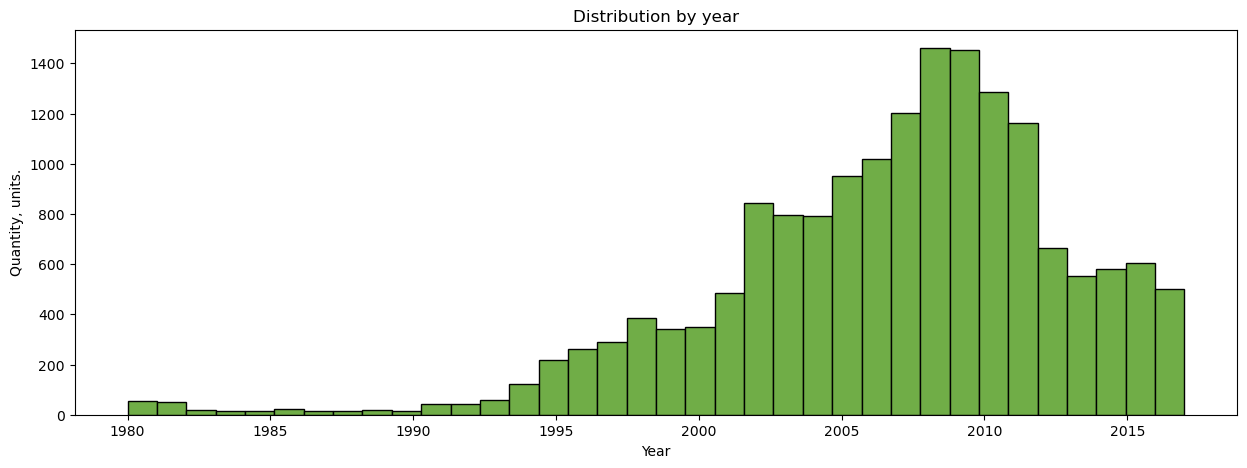

In [192]:
df['year_of_release'].plot(kind='hist', bins=36, range=(1980,2017), figsize=(15,5),  color="#70AD47", edgecolor="black")
plt.title("Distribution by year")
plt.xlabel("Year")
plt.ylabel("Quantity, units.")
plt.show()

**The histogram shows certain trends in the growth and decrease in the number of games over the years. As previously established, these trends are often tied to the release of new gaming platforms. If we accept the hypothesis that it is now the end of 2016 and it is necessary to rely on data for forecasts for 2017, it is most correct to take data from 2012 to 2016 inclusive. In this period of time, eighth-generation consoles entered the market, which remained the most relevant until the end of the observed period. According to data at the end of 2016, only 1 new platform (Xbox One X) may be released in 2017, and therefore it can be assumed that the dynamics of recent years will be observed.**

In [193]:
df_after_2012 = df.query('year_of_release >= 2012')

___

Next, it is necessary to analyze how sales have changed across platforms with the highest total sales.

In [194]:
top_20_platforms = df.pivot_table(
    index = ['platform'], values = 'total_sales', aggfunc = 'sum').sort_values(
    "total_sales", ascending=False).reset_index().head(20)
top_20_platforms

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


Having received a list of the most successful platforms by the number of games sold, we can build their distribution by year.

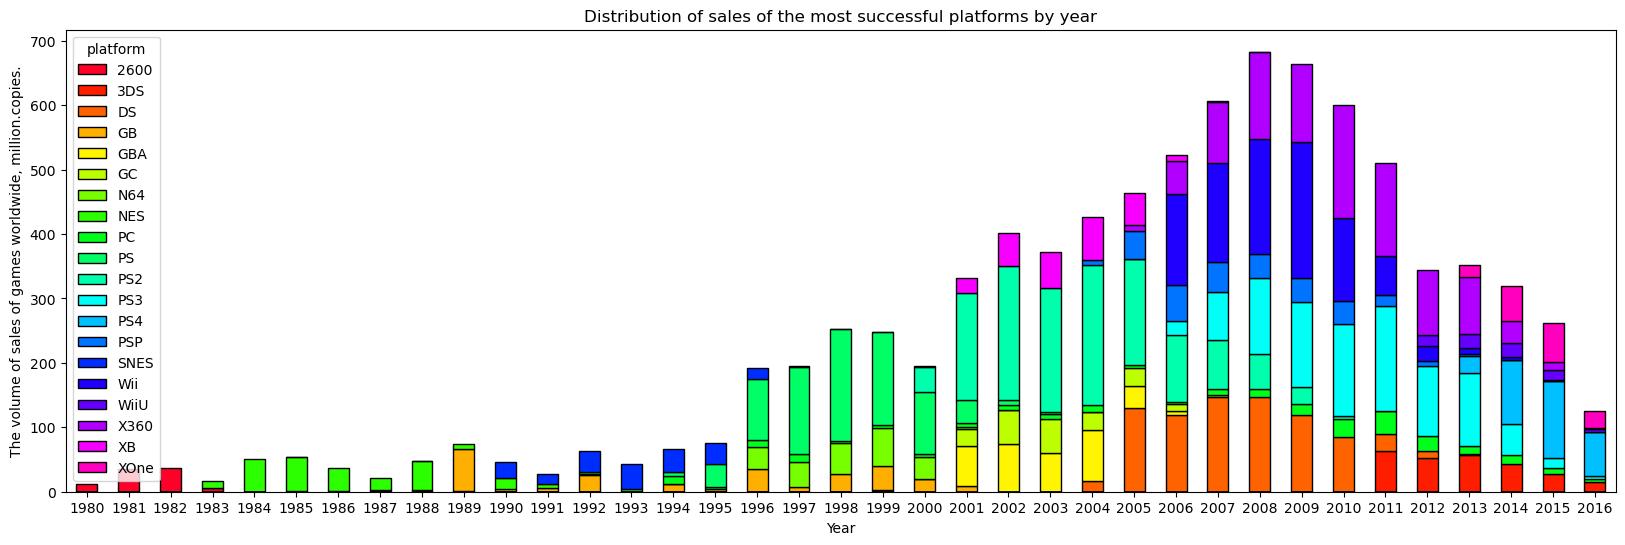

In [195]:
top_20_list = list(top_20_platforms['platform'])
top_20_query = df.query('platform in @top_20_list')
top_20_pivot = top_20_query.pivot_table(
    index='year_of_release', columns='platform', values = 'total_sales', aggfunc='sum')
ax = top_20_pivot.plot.bar(rot=0, stacked=True, figsize = (20,6), colormap="gist_rainbow", edgecolor = 'black')
plt.title("Distribution of sales of the most successful platforms by year")
plt.xlabel("Year")
plt.ylabel("The volume of sales of games worldwide, million.copies.")
plt.show()

According to this graph, it can be seen that, on average, gaming platforms remain in demand for 9-11 years. The exception is a personal computer due to the fact that the components are constantly updated in it, unlike gaming platforms, where updates are implemented as part of a generational change of models.

In [196]:
top_20_actual_period = df_after_2012.query('platform in @top_20_list').pivot_table(
    index='platform', values='total_sales', columns='year_of_release', aggfunc='sum')
top_20_actual_period

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
3DS,51.76,57.04,43.76,27.78,15.14
DS,11.67,1.54,NaN,NaN,NaN
PC,23.80,12.66,13.28,8.52,5.25
PS3,108.28,113.25,47.76,16.82,3.60
PS4,NaN,25.99,100.00,118.90,69.25
PSP,7.95,3.38,0.24,0.12,NaN
Wii,22.94,8.59,3.75,1.14,0.18
WiiU,17.56,21.65,22.03,16.35,4.60
X360,100.72,88.58,34.74,11.96,1.52


Trends in sales volume for the period relevant to the forecast (**since 2012**) can be distinguished:

- sales volume for the Game Boy Advance (GBA) console is declining (8 years on the market);
- Playstation 3(PS3) sales are also declining, albeit at a less rapid pace (7 years on the market);
- sales of the recently launched Nintendo 3DS (3DS) have been stable since the start of sales (2 years on the market);
- the leader in growth rates for the period 2013 - 2016 - PS4, in 2014-2016 also the leader in sales of video games;
- starting in 2014, the next console in terms of sales volumes after the PS4 is the XOne, released on the market in 2013;
- the volume of sales of games on the PC (PC) is stable.

****According to the presented schedule and cut, potentially profitable platforms include:**
- **Playstation 4 (PS4)**;
- **X box One (XOne)**
- **Nintendo 3DS (3DS)**;
- **Personal computer (PC)**;

According to the results of 2016, there were some sales of games for the Playstation 3 (PS3) platform, but in fact the demand for this platform has passed its peak and decreased every year after the release of a new generation of consoles from Sony (PS4).

**Also, the list of potentially profitable platforms could include the Xbox One S platform released at the end of 2016 (the successor to the X box One). This budget version (compared to the potentially more expensive Xbox One X) also has potential and was not included in the sample, probably due to the late start of sales in 2016.**

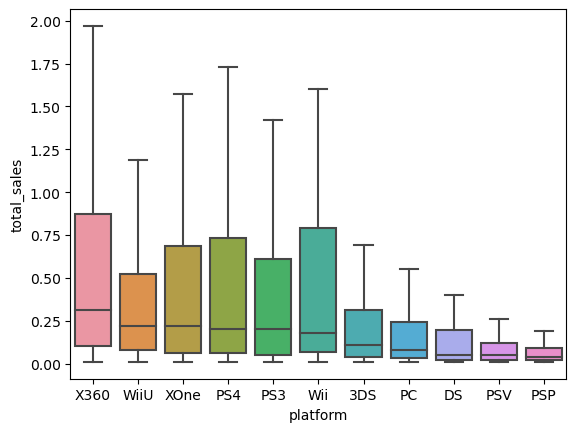

In [197]:
my_order = df_after_2012.groupby(by=["platform"])["total_sales"].median().sort_values(ascending=False).index
ax = sns.boxplot(x="platform", y="total_sales", 
                 data=df_after_2012, showfliers=False, order = my_order)

**Xbox (Microsoft) holds a leading position in terms of sales of game titles with X360 and XOne platforms, followed by Nintendo and Sony.**

___
Next, we can study whether there is a relationship between the ratings made by critics / users and the volume of sales within one of the gaming platforms.

It is better to choose from platforms for which we have a significant volume of sales - PS3 or PS4. Due to the fact that the PS4 was released relatively recently and is still gaining sales volumes for games, it was decided to study the dependence on the PS3 platform.

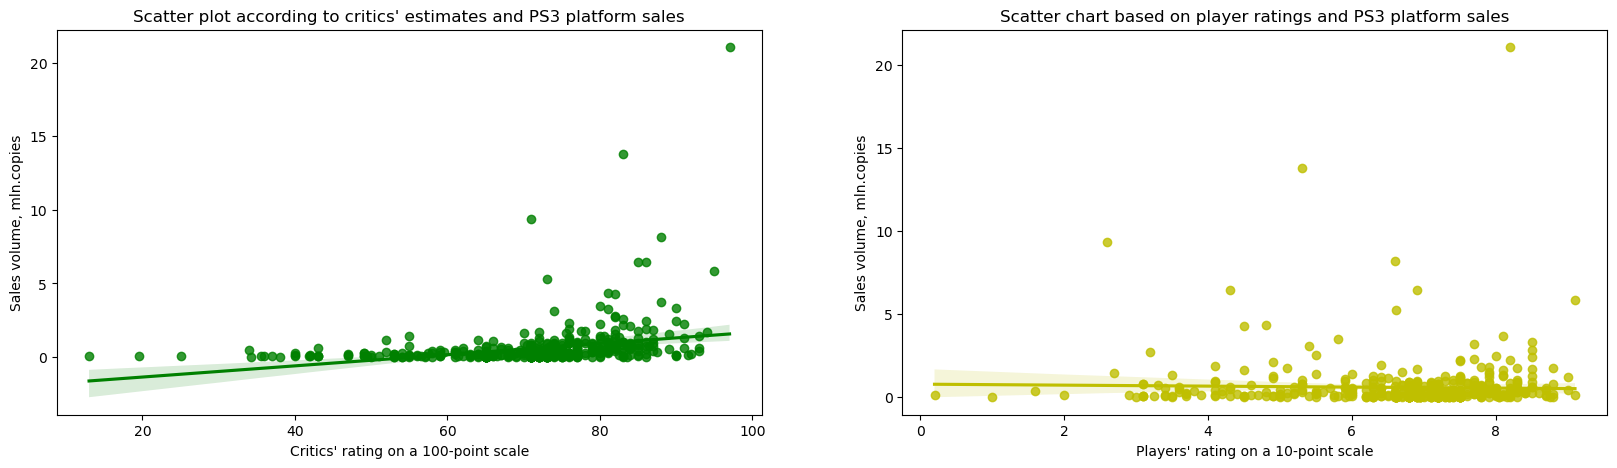

In [198]:
df_PS3 = df_after_2012.query('platform == "PS3"')

fig, axs = plt.subplots(1, 2, figsize=(20,5))
sns.regplot(data=df_PS3, x='critic_score', y = 'total_sales', ax=axs[0], color='g')
sns.regplot(data=df_PS3, x='user_score', y = 'total_sales', ax=axs[1], color='y')
axs[0].set_title("Scatter plot according to critics' estimates and PS3 platform sales")
axs[0].set_xlabel("Critics' rating on a 100-point scale")
axs[0].set_ylabel("Sales volume, mln.copies")
axs[1].set_title('Scatter chart based on player ratings and PS3 platform sales')
axs[1].set_xlabel("Players' rating on a 10-point scale")
axs[1].set_ylabel("Sales volume, mln.copies")
plt.show()

In [199]:
display("Correlation between critics' ratings and sales:", df_PS3['critic_score']. corr(df_PS3['total_sales']))
display("Correlation between player ratings and sales:", df_PS3['user_score']. corr(df_PS3['total_sales']))

"Correlation between critics' ratings and sales:"

0.29575301239538493

'Correlation between player ratings and sales:'

-0.02757780618508311

**According to the graphs and values of the correlation coefficient, it can be seen that critics' ratings have little effect on the sales figures of games on the PS3 platform, at the same time, user ratings do not affect the sales of games at all.**

For all other platforms, establishing the existence of a relationship between estimates and sales looks like this:

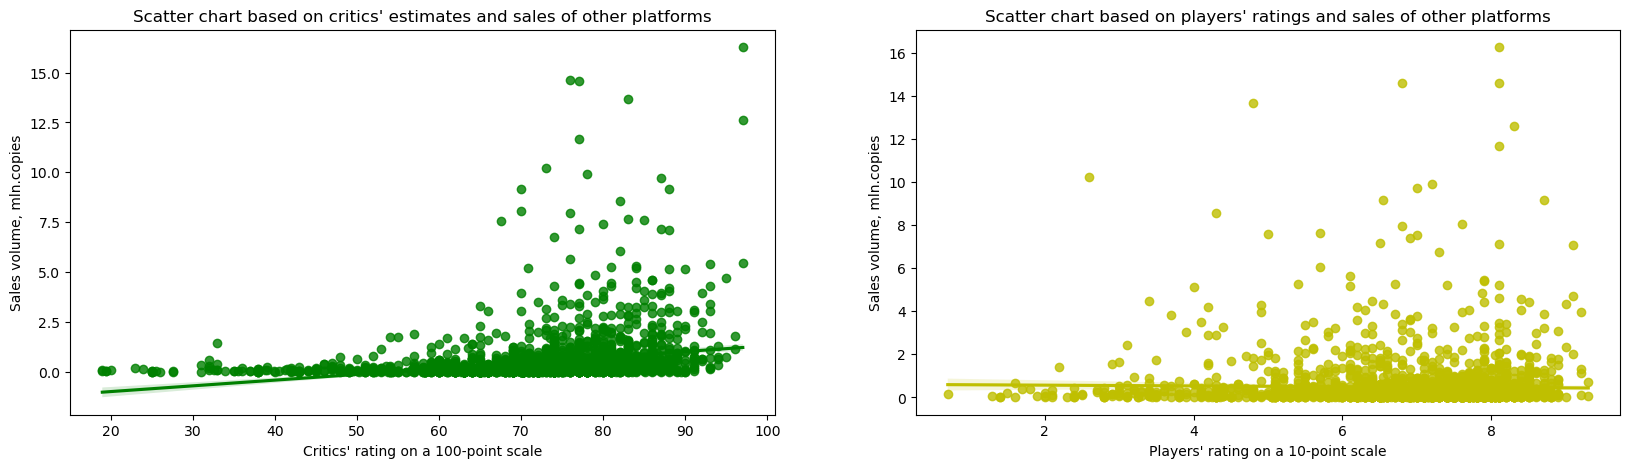

In [200]:
df_no_PS3 = df_after_2012.query('platform != "PS3"')

fig, axs = plt.subplots(1, 2, figsize=(20,5))
sns.regplot(data=df_no_PS3, x='critic_score', y = 'total_sales', ax=axs[0], color='g')
sns.regplot(data=df_no_PS3, x='user_score', y = 'total_sales', ax=axs[1], color='y')
axs[0].set_title("Scatter chart based on critics' estimates and sales of other platforms")
axs[0].set_xlabel("Critics' rating on a 100-point scale")
axs[0].set_ylabel("Sales volume, mln.copies")
axs[1].set_title("Scatter chart based on players' ratings and sales of other platforms")
axs[1].set_xlabel("Players' rating on a 10-point scale")
axs[1].set_ylabel("Sales volume, mln.copies")
plt.show()

In [201]:
display("Correlation between critics' ratings and sales: ", df_no_PS3['critic_score']. corr(df_no_PS3['total_sales']))
display("Correlation between players' ratings and sales: ", df_no_PS3['user_score']. corr(df_no_PS3['total_sales']))

"Correlation between critics' ratings and sales: "

0.2624309936190391

"Correlation between players' ratings and sales: "

-0.019244183532542335

**Thus, for all other platforms, there is also no dependence of sales on user ratings, and dependence on critics' ratings is manifested to a lesser extent, and,  practically does not affect sales.**

Next, it is necessary to study the distribution of games by genre.

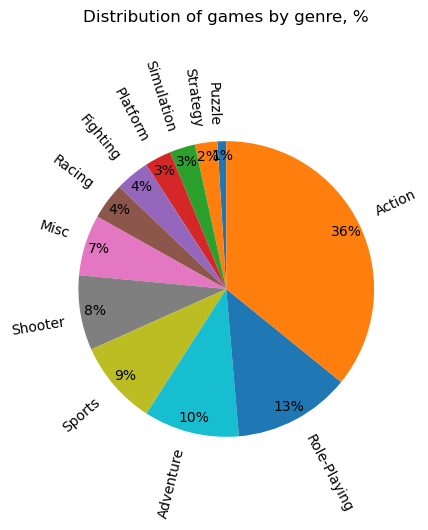

In [202]:
df_after_2012.groupby('genre')['genre'].count().sort_values(
    ascending=True).plot(kind='pie', autopct='%1.f%%', startangle=90, rotatelabels = True, pctdistance=0.9, label='')

plt.title('Distribution of games by genre, %', y=1.2)
plt.show()

**The graph shows that more than a third (36%) of all games presented in the sample are released in the Action genre, followed by games of the Role-playing genre. The gap between these two positions in terms of the number of games released is almost threefold.**

Next, it is necessary to study which of the genres are the most popular among buyers.

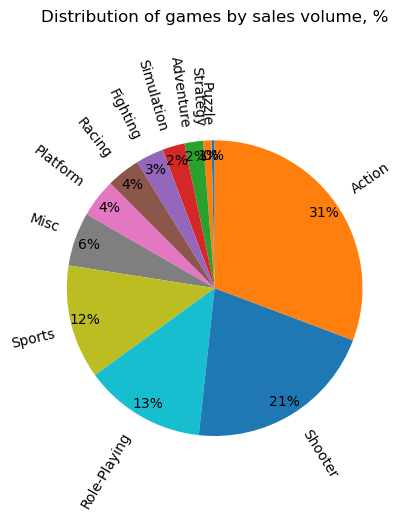

In [203]:
df_after_2012.groupby('genre')['total_sales'].sum().sort_values(
    ascending=True).plot(kind='pie', autopct='%1.f%%', startangle=90, rotatelabels = True, pctdistance=0.9, label='')

plt.title("Distribution of games by sales volume, %", y=1.2)
plt.show()

**As in the distribution by the number of games, the best-selling genre turned out to be *Action*. Next come sports shooters (Shooter), the difference in sales volumes between the first two positions is much less significant than in the ranking by the number of games produced. Games in the genre of *Role-playing* are among the three most popular games among buyers**

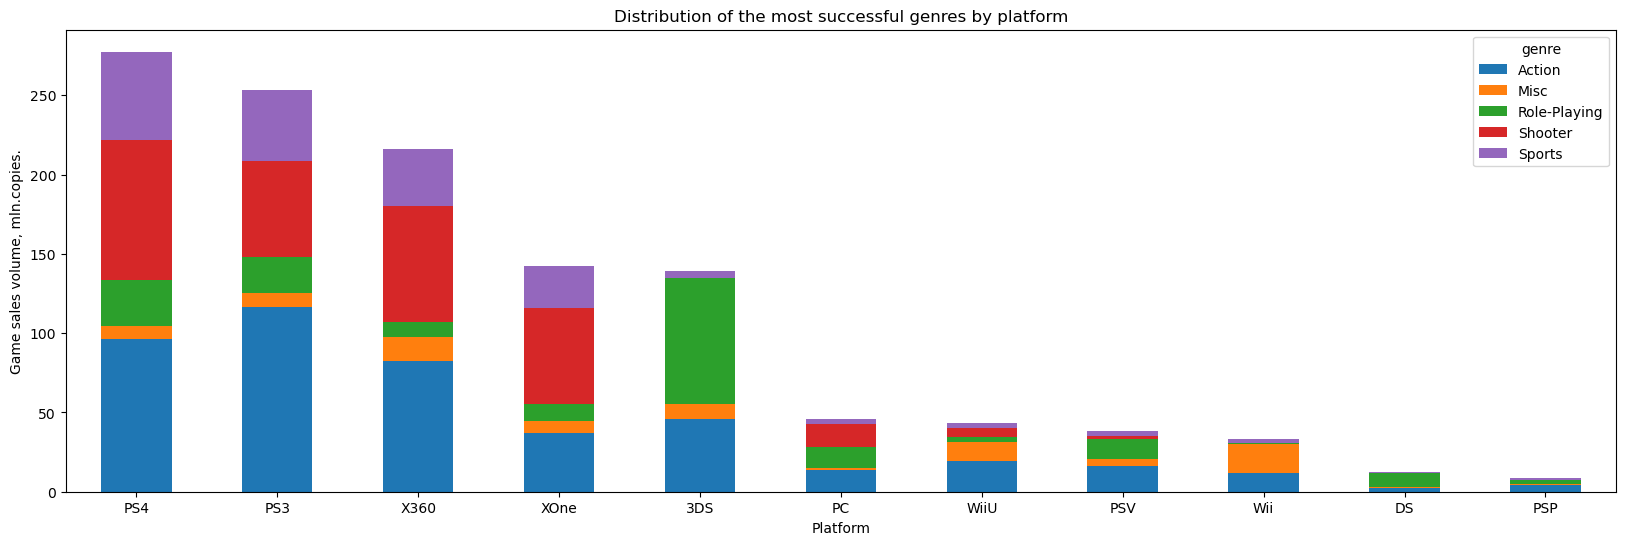

In [204]:
top_5_genres = df_after_2012.pivot_table(
    index = ['genre'], values = 'total_sales', aggfunc = 'sum').sort_values(
    "total_sales", ascending=False).reset_index().head(5)
top_5_genres = list(top_5_genres['genre'])
top_5_genres_query = df_after_2012.query('genre in @top_5_genres')
top_5_genres_pivot = top_5_genres_query.pivot_table(
    index='platform', columns = 'genre', values = 'total_sales', aggfunc = 'sum')
top_5_genres_pivot['total_sales'] = top_5_genres_pivot.sum(axis=1, numeric_only=None)
top_5_genres_pivot = top_5_genres_pivot.sort_values(by='total_sales', ascending=False)
top_5_genres_pivot.drop('total_sales', axis=1, inplace=True)
ax = top_5_genres_pivot.plot.bar(rot=0, stacked=True, figsize = (20,6))
plt.title("Distribution of the most successful genres by platform")
plt.xlabel("Platform")
plt.ylabel("Game sales volume, mln.copies.")
plt.show()

**According to the chart, these genres can be noted as the most profitable:**

- the Shooter genre is the most popular on PS4
- Role-playing games were most popular among 3DS owners
- on the PS2, PS3 and X360 consoles, Action genre games occupy a higher share than on other consoles.

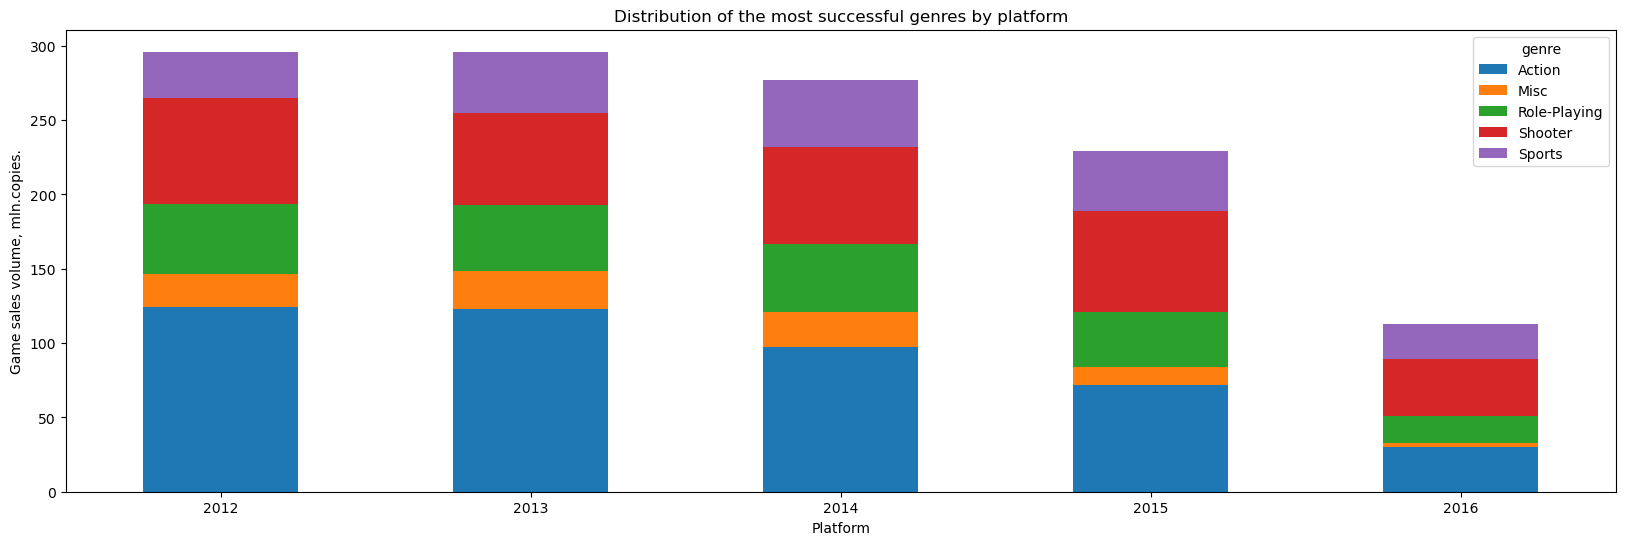

In [205]:
top_5_genres_pivot = top_5_genres_query.pivot_table(
    index='year_of_release', columns = 'genre', values = 'total_sales', aggfunc = 'sum')
ax = top_5_genres_pivot.plot.bar(rot=0, stacked=True, figsize = (20,6))
plt.title("Distribution of the most successful genres by platform")
plt.xlabel("Platform")
plt.ylabel("Game sales volume, mln.copies.")
plt.show()

**According to the chart, these genres can be noted as the most profitable:**

- the level of sales of Shooter genre games for the period 2012-2016 was the most stable in comparison with other genres;
- The *Misc* genre declined in terms of sales in 2016 more than other games in other genres.

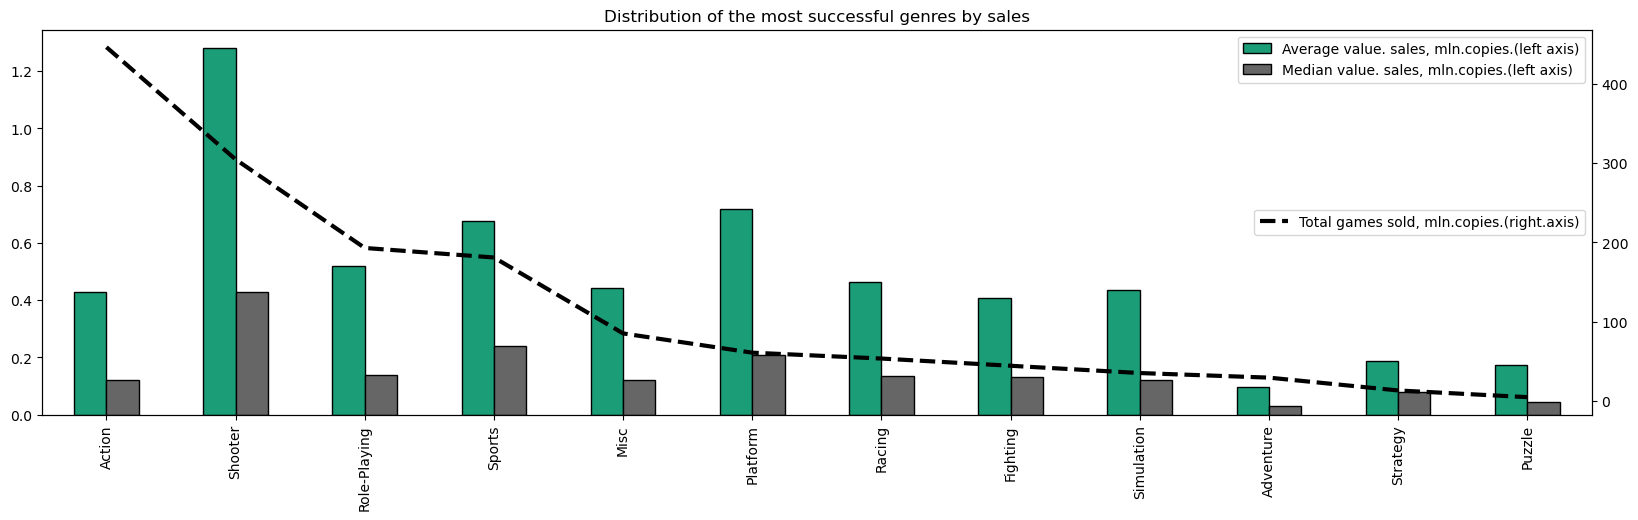

In [206]:
genre_metrics = df_after_2012.pivot_table(index='genre', values='total_sales', aggfunc=['mean','median','sum']).reset_index()
genre_metrics.columns=['genre','mean_sales', 'median_sales','total_sales']
genre_metrics = genre_metrics.sort_values(by='total_sales', ascending=False)

labels = list(genre_metrics['genre'])

ax = genre_metrics[['mean_sales','median_sales']].plot(kind='bar', use_index=True, figsize=(20,5), colormap="Dark2", edgecolor='black')
ax.set_xticklabels(labels)
ax2 = ax.twinx()
ax2.plot(genre_metrics['total_sales'].values,linestyle='--', linewidth=3.0, color = 'black')
ax.legend(('Average value. sales, mln.copies.(left axis)', 'Median value. sales, mln.copies.(left axis)'), loc='upper right')
ax2.legend(['Total games sold, mln.copies.(right.axis)'], loc=5)
plt.title("Distribution of the most successful genres by sales")
plt.show()

In [207]:
genre_mean = df_after_2012.pivot_table(index='genre', values='total_sales', aggfunc=['mean','median','sum','count']).reset_index()
genre_mean.columns=['genre','mean_sales', 'median_sales','total_sales', 'total_games']
genre_mean = genre_mean.sort_values(by='median_sales', ascending=False)
genre_mean

,genre,mean_sales,median_sales,total_sales,total_games
8,Shooter,1.280756,0.430,304.82,238
10,Sports,0.675634,0.240,181.07,268
4,Platform,0.717647,0.210,61.00,85
7,Role-Playing,0.519059,0.140,193.09,372
6,Racing,0.461983,0.135,53.59,116
2,Fighting,0.408165,0.130,44.49,109
0,Action,0.428828,0.120,446.41,1041
3,Misc,0.441865,0.120,85.28,193
9,Simulation,0.435926,0.120,35.31,81
11,Strategy,0.187887,0.080,13.34,71


Without need of more detailed specification, it can be noted that ** in total, the best-selling game genres are:**

- Action
- The shooter
- Role-playing games
- Sports

The advantage of these genres in the total sales structure is clearly visible.
It is also possible to note the disparity between the indicators of total sales and average values. In the action genre, the average sales figures are three times lower than in the shooter genre, which means that the action of games is produced significantly more, but the shooter is more commercially successful.

In absolute terms, more RPG (Role-playing game) games were released than a Shooter, but 37% less were sold. This is also evident by the more than twofold difference in the average and median sales values.

Thus, when correlating median sales figures (in order to avoid bias due to the presence of AAA titles), ** the most commercially successful genres are**:

- The shooter
- Sports
- Platform
___

## Portrait of the user from each region

As part of drawing up a user portrait, it is necessary to study the most popular platforms in North America, Europe and Japan.

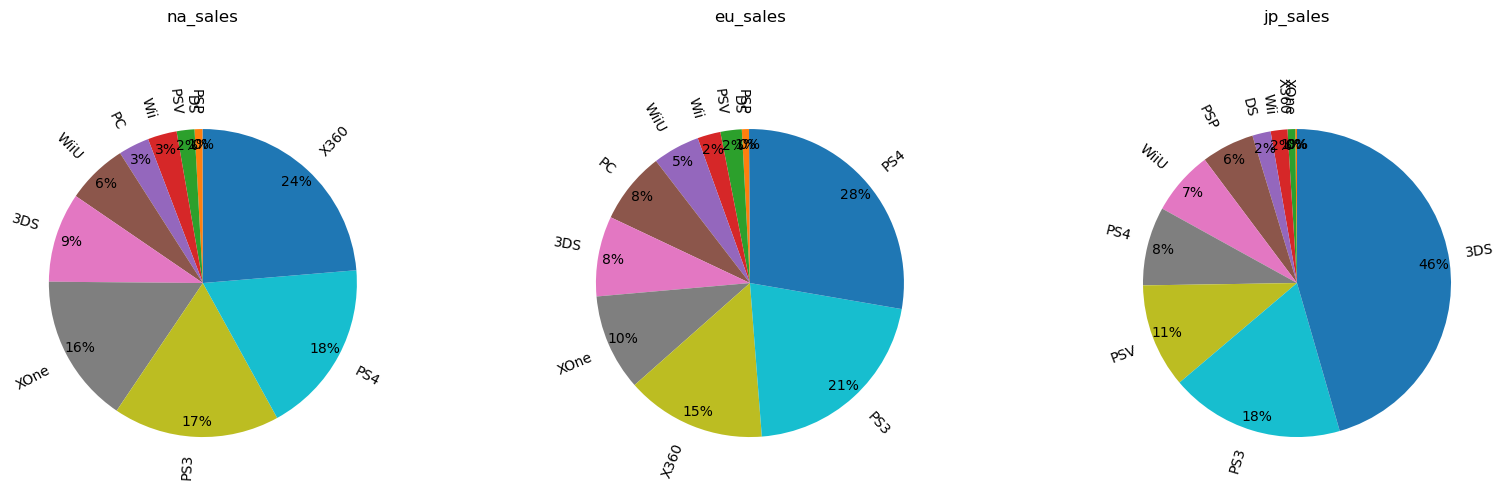

In [208]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))
counter = 0

for region in ('na_sales', 'eu_sales', 'jp_sales'):
    fd = df_after_2012.groupby('platform')[region].sum().sort_values(ascending=True)    
    fd.plot(kind='pie', ax = axs[counter], autopct='%1.f%%', startangle=90, rotatelabels = True, pctdistance=0.9, label='')
    axs[counter].set_title(region, pad=50)
    counter +=1

**On the presented graphs, we can note:**
- In North America and Europe in the top 5 platforms, the first 4 lines are occupied by sales of games for consoles from Sony and Microsoft (PS4, PS3, X360 and XOne), and the 3DS console barely gets into the top 5 platforms in terms of game sales. In Japan, the volume of games sold for 3DS ranks first in terms of the volume of games sold.
- In North America and Europe, the gap between neighboring lines in the top 5 platforms in terms of sales is relatively small (1-7%), while in Japan, 3DS is almost three times larger than PS3 in terms of sales.
- In Japan, the top 5 ranking of platforms in terms of the volume of games sold included only consoles manufactured in Japan.
___

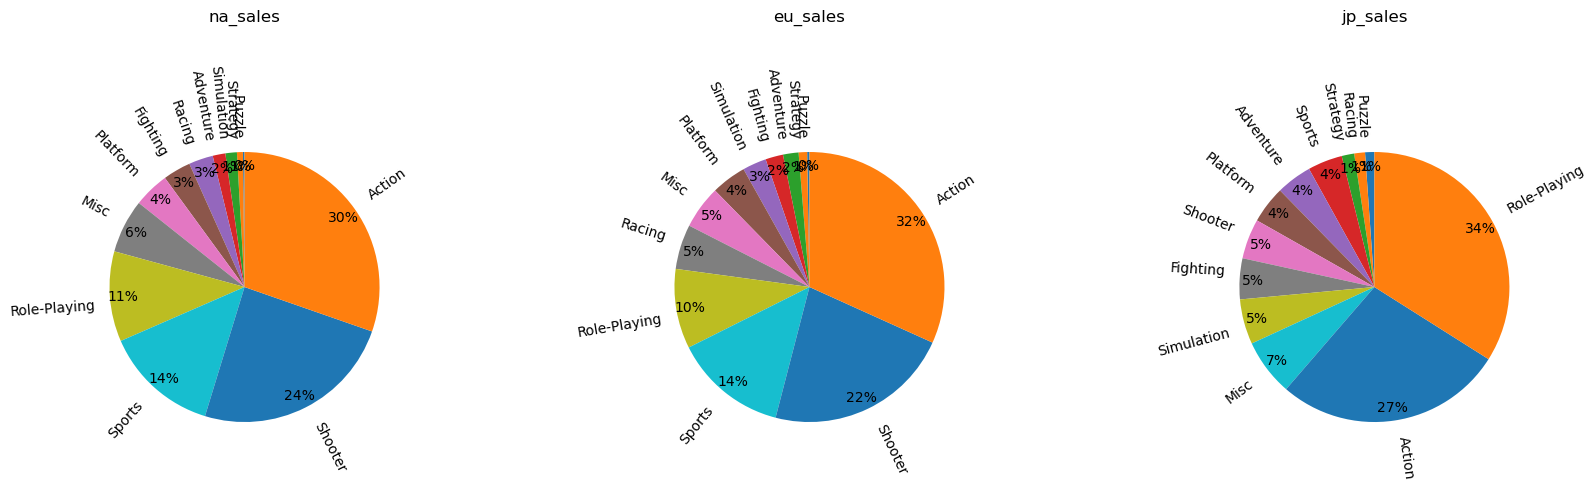

In [209]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))
counter = 0

for region in ('na_sales', 'eu_sales', 'jp_sales'):
    fd = df_after_2012.groupby('genre')[region].sum().sort_values(ascending=True)    
    fd.plot.pie(ax = axs[counter], autopct='%1.f%%', startangle=90, rotatelabels = True, pctdistance=0.9, label='')
    plt.tight_layout()
    axs[counter].set_title(region, pad=70)
    counter +=1  


**On the presented graphs, we can note:**
- In North America and Europe in the top 5 genres, the first 4 lines are occupied by: * Action, Shooter, Sports, Role-playing*. At the same time, in addition to the coincidence of the genres themselves, they are almost identical in their shares in the total sales structure of games.
- In North America and Europe, there is clearly a gap in the share between the 4 most popular genres and all the others (the share of which does not exceed 5-6%).
- - In Japan, the most popular genre of the game among buyers is *Role-playing*, and the leader of the countries of North America and Europe (*Action*) is only the second. In total, these 2 genres account for almost 2/3 (61%) of all purchased games, the share of other genres individually does not exceed 7%.

___

Next, it is necessary to study the impact of the ESRB rating on sales.

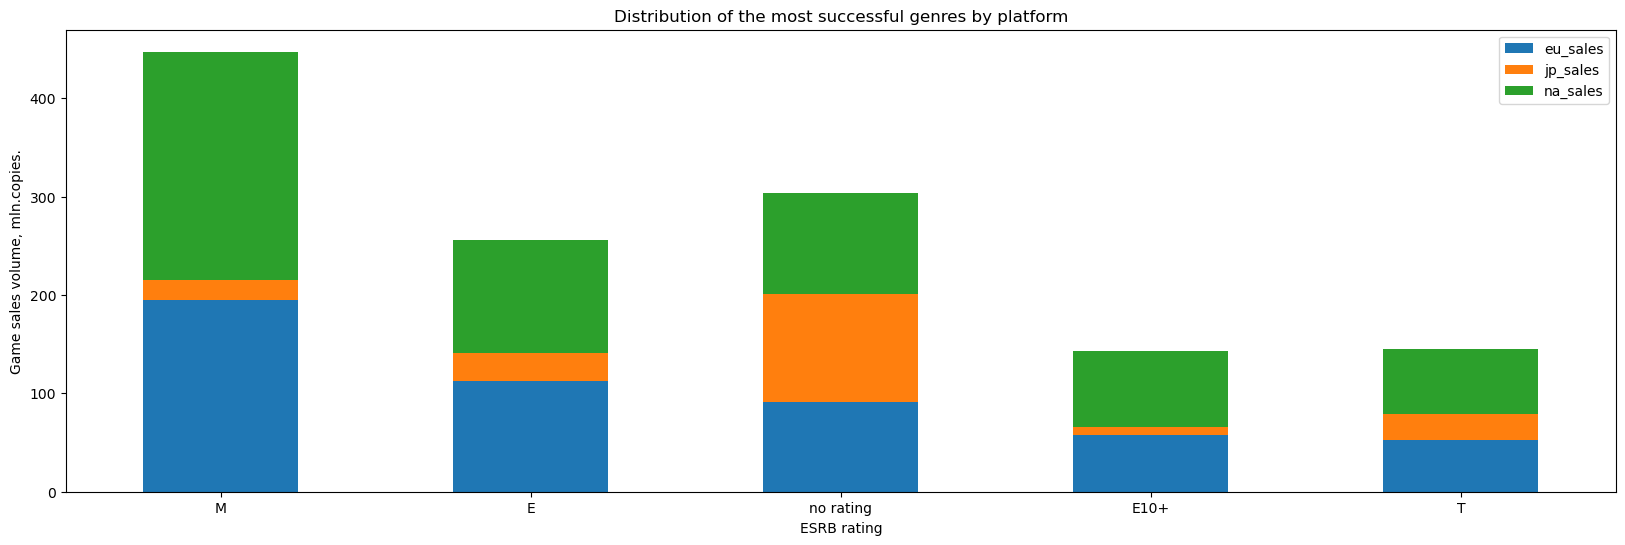

In [210]:
groupby_rating = df_after_2012.pivot_table(index=['rating'],
                                      values =['na_sales', 'eu_sales', 'jp_sales'],
                                      aggfunc=sum).sort_values(by='na_sales', ascending=False)


ax = groupby_rating.plot.bar(rot=0, stacked=True, figsize = (20,6))
plt.title("Distribution of the most successful genres by platform")
plt.xlabel("ESRB rating")
plt.ylabel("Game sales volume, mln.copies.")
plt.show()

In [211]:
df_after_2012.pivot_table(index='platform', columns='rating', values='total_sales', aggfunc='count')

rating,E,E10+,M,T,no rating
platform,,,,,
3DS,56.0,55.0,9.0,27.0,255.0
DS,10.0,6.0,NaN,NaN,16.0
PC,36.0,18.0,95.0,41.0,65.0
PS3,64.0,40.0,106.0,91.0,193.0
PS4,54.0,40.0,76.0,85.0,137.0
PSP,5.0,1.0,NaN,2.0,167.0
PSV,20.0,23.0,32.0,64.0,273.0
Wii,17.0,16.0,NaN,2.0,20.0
WiiU,35.0,42.0,15.0,13.0,42.0


**On the presented graph, you can note:**

- M-rated games were the most popular among buyers from North America and Europe;
- The next most popular among buyers from North America and Europe were games with an E rating;
- A significant part of the games in the sample was without specifying the rating;
- - Such a significant share of games sold in Japan without a rating is due to the fact that the ESRB did not give an assessment

Due to the absence of a significant part of the data on the rating of games from the ESRB, it is impossible to reliably say whether the rating affects the sales of games. According to the available data, there was no obvious impact on sales volume.
___

## Hypothesis testing

**Null hypothesis** - the average user ratings of the Xbox One and PC platforms are equal

**Alternative hypothesis** - the average user ratings of the Xbox One and PC platforms are not equal

alpha = 5%

Before conducting a statistical test, we will conduct a Barlett test to determine whether the sample variances are equal.

In [212]:
XOne = df_after_2012.query('platform == "XOne"')['user_score']
PC = df_after_2012.query('platform == "PC"')['user_score']
stat, p = bartlett(XOne, PC)
p

0.0007278452277413999

Since the p-value is less than 5%, when calculating the statistical test, it can be indicated that the sample variances are not equal.

In [213]:
alpha = .05

results = st.ttest_ind(
    XOne, 
    PC, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("It was not possible to reject the null hypothesis")

p-значение: 0.6555050065020716
It was not possible to reject the null hypothesis


In [214]:
display(XOne.median())
display(PC.median())

6.9

7.1

According to the results of this statistical test, it was not possible to refute the hypothesis that the average user ratings of the Xbox One and PC platforms are equal. The median values for the sample are also very close.
If the hypothesis had been rejected with a probability of 66%, this decision could have been erroneous.
___

**Null hypothesis** - average user ratings of Action and Sports genres are equal

**Alternative hypothesis** - average user ratings of Action and Sports genres are not equal

alpha = 5%

Before conducting a statistical test, we will conduct a Barlett test to determine whether the sample variances are equal.

In [215]:
Action = df_after_2012.query('genre == "Action"')['user_score']
Sports = df_after_2012.query('genre == "Sports"')['user_score']
stat, p = bartlett(Action, Sports)
p

2.207011700337458e-18

Since the p-value is less than 5%, when calculating the statistical test, it can be indicated that the sample variances are not equal.

In [216]:
alpha = .05

results = st.ttest_ind(
    Action, 
    Sports, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("It was not possible to reject the null hypothesis")

p-значение: 3.321966496060266e-30
We reject the null hypothesis


In [217]:
display(Action.median())
display(Sports.median())

7.2

5.95

With 99% confidence, it can be argued that the average user ratings of the Action and Sports genres differ. More often, users rated Action genre games higher than Sports genre games.
___

## Conclusion

According to the results of statistical tests, it was not possible to refute the hypothesis that the average user ratings of the Xbox One and PC platforms are equal. Also, according to the results of statistical tests with 99% confidence, it can be stated that the average user ratings of the Action and Sports genres differ.

Additionally, within the framework of the study , it was established:
- As of the end of 2016, the eighth generation consoles (PS4, Xbox One S) remain the most relevant on the market. In 2017, only 1 new platform is scheduled to be released, and therefore it can be assumed that the dynamics of recent years will be observed since the release of the aforementioned consoles (2012-2016). This period should be taken for the forecast for 2017;

- on average, gaming platforms have remained in demand for 9-11 years;
